<a href="https://www.kaggle.com/code/kapturovalexander/kapturov-s-view-on-diabetes-dataset?scriptVersionId=225965447" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://storage.googleapis.com/kaggle-datasets-images/6704716/10802370/29281e6b9404897ea2968d6fb321e431/dataset-cover.png?t=2025-02-20-08-42-31)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-dataset/diabetes_dataset.csv


This dataset contains **9,538 medical records** related to **diabetes diagnosis and risk factors**. It includes various **health parameters, lifestyle habits, and genetic predispositions** that contribute to **diabetes risk**. The data is structured with **realistic distributions**, making it valuable for **medical research, statistical analysis, and machine learning applications**.

### <span style="color:purple">Features</span>:

- **<span style="color:purple">Age</span>**: The age of the individual (**18-90 years**).
- **<span style="color:purple">Pregnancies</span>**: Number of times the patient has been pregnant.
- **<span style="color:purple">BMI</span>** (**Body Mass Index**): A measure of **body fat** based on height and weight (**kg/m²**).
- **<span style="color:purple">Glucose</span>**: **Blood glucose concentration** (**mg/dL**), a key **diabetes indicator**.
- **<span style="color:purple">BloodPressure</span>**: **Systolic blood pressure** (**mmHg**), higher levels may indicate **hypertension**.
- **<span style="color:purple">HbA1c</span>**: **Hemoglobin A1c level** (**%**), representing **average blood sugar over months**.
- **<span style="color:purple">LDL</span>** (**Low-Density Lipoprotein**): "**Bad**" cholesterol level (**mg/dL**).
- **<span style="color:purple">HDL</span>** (**High-Density Lipoprotein**): "**Good**" cholesterol level (**mg/dL**).
- **<span style="color:purple">Triglycerides</span>**: **Fat levels in the blood** (**mg/dL**), high values **increase diabetes risk**.
- **<span style="color:purple">WaistCircumference</span>**: **Waist measurement** (**cm**), an indicator of **central obesity**.
- **<span style="color:purple">HipCircumference</span>**: **Hip measurement** (**cm**), used to calculate **WHR**.
- **<span style="color:purple">WHR</span>** (**Waist-to-Hip Ratio**): **Waist circumference divided by hip circumference**.
- **<span style="color:purple">FamilyHistory</span>**: Indicates if the individual has a **family history of diabetes** (**1 = Yes, 0 = No**).
- **<span style="color:purple">DietType</span>**: **Dietary habits** (**0 = Unbalanced, 1 = Balanced, 2 = Vegan/Vegetarian**).
- **<span style="color:purple">Hypertension</span>**: Presence of **high blood pressure** (**1 = Yes, 0 = No**).
- **<span style="color:purple">MedicationUse</span>**: Indicates if the individual is **taking medication** (**1 = Yes, 0 = No**).
- **<span style="color:purple">Outcome</span>**: **Diabetes diagnosis result** (**1 = Diabetes, 0 = No Diabetes**).

**Version 1:** Minimal EDA + Catboost (1 iteration) without hyperparemeter tuning

**Version 2:** Fixed little typos and add countplot to visualize target feature

### <span style='color: violet'>Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# <span style='color: violet'>EDA

In [3]:
diab = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes_dataset.csv')
diab.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [4]:
diab.shape

(9538, 17)

In [5]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

In [6]:
diab.isna().sum()

Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

#### There are no gaps the data. We made a double check

In [7]:
diab.duplicated().sum()

0

#### There are no duplicates in the data

In [8]:
diab.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9538.0,53.577584,20.764651,18.00,36.00,53.00,72.00,89.00
Pregnancies,9538.0,7.986161,4.933469,0.00,4.00,8.00,12.00,16.00
BMI,9538.0,27.052364,5.927955,15.00,22.87,27.05,31.18,49.66
Glucose,9538.0,106.104183,21.918590,50.00,91.00,106.00,121.00,207.20
BloodPressure,9538.0,84.475781,14.123480,60.00,74.00,84.00,94.00,138.00
HbA1c,9538.0,4.650661,0.476395,4.00,4.30,4.60,5.00,6.90
LDL,9538.0,100.133456,29.911910,-12.00,80.10,99.90,120.20,202.20
HDL,9538.0,49.953418,15.242194,-9.20,39.70,50.20,60.20,107.80
Triglycerides,9538.0,151.147746,48.951627,50.00,117.20,150.55,185.10,345.80
WaistCircumference,9538.0,93.951678,15.594468,40.30,83.40,93.80,104.60,163.00


#### At first glance there are no outliers

In [9]:
diab['DietType'].value_counts()

DietType
0    5794
1    2851
2     893
Name: count, dtype: int64

In [10]:
diab['Hypertension'].value_counts()

Hypertension
0    9528
1      10
Name: count, dtype: int64

#### Only 10 people have hypertension

In [11]:
diab['Outcome'].value_counts()

Outcome
0    6256
1    3282
Name: count, dtype: int64

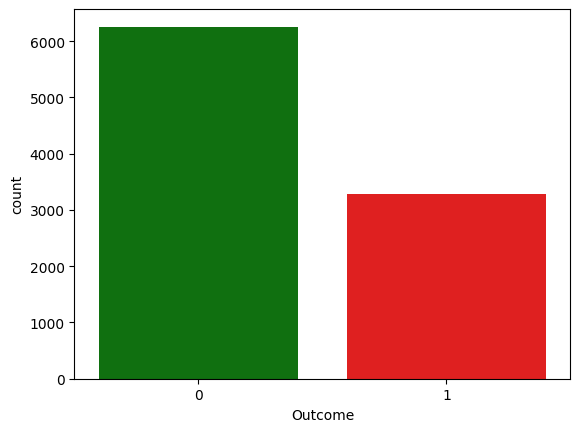

In [12]:
sns.countplot(data=diab, x='Outcome', palette=('green', 'red'));

### <span style='color: violet'>Model Training

In [13]:
X = diab.drop('Outcome', axis=1)
y = diab['Outcome']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [15]:
cat = CatBoostClassifier(iterations=1, verbose=False)
cat.fit(X_train, y_train)

In [16]:
y_pred = cat.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279
           1       1.00      1.00      1.00       629

    accuracy                           1.00      1908
   macro avg       1.00      1.00      1.00      1908
weighted avg       1.00      1.00      1.00      1908



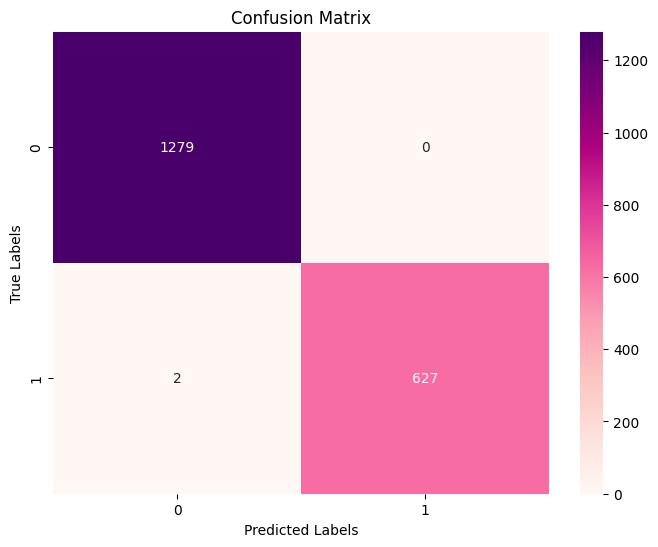

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='RdPu', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### The dataset is suitable for beginners because there is a strong correlation between the features and the target.

In [18]:
y_test.value_counts()

Outcome
0    1279
1     629
Name: count, dtype: int64